In [47]:
%pylab inline
import glob
from tqdm import tqdm
from skimage.io import imread
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray

from pywsi.morphology.operations import open_close
from pywsi.morphology.operations import close_open


from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk, 

Populating the interactive namespace from numpy and matplotlib


/home/saket/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
normal_patches_dir = '../normal_patches_test/level_0/'
tumor_patches_dir = '../tumor_patches_test/level_0/'


np.random.seed(42)
master_matrix = []
label_matrix = []
y = []
list_of_tumor_files = list(glob.glob('{}*.png'.format(tumor_patches_dir)))
list_of_tumor_files = np.random.choice(list_of_tumor_files, 5000)
for f in tqdm(list_of_tumor_files):
    master_matrix.append(imread(f))
    label_matrix.append('tumor')
    y.append(1)

tumor_count = len(label_matrix)

list_of_normal_files = list(glob.glob('{}*.png'.format(normal_patches_dir)))
list_of_normal_files = np.random.choice(list_of_normal_files, 5000)
#np.random.shuffle(list_of_normal_files)

for f in tqdm(list_of_normal_files):    
    master_matrix.append(imread(f))
    label_matrix.append('normal')
    y.append(0)
    
master_matrix = np.array(master_matrix)
y=np.array(y)

100%|██████████| 5000/5000 [02:16<00:00, 36.69it/s]


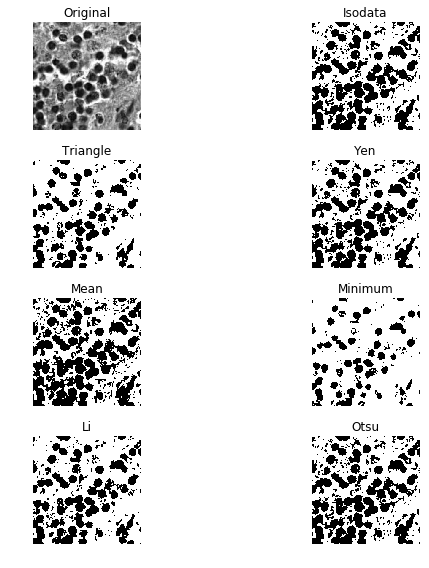

In [15]:
fig, ax = try_all_threshold(rgb2gray(master_matrix[0]), figsize=(10, 8), verbose=False)


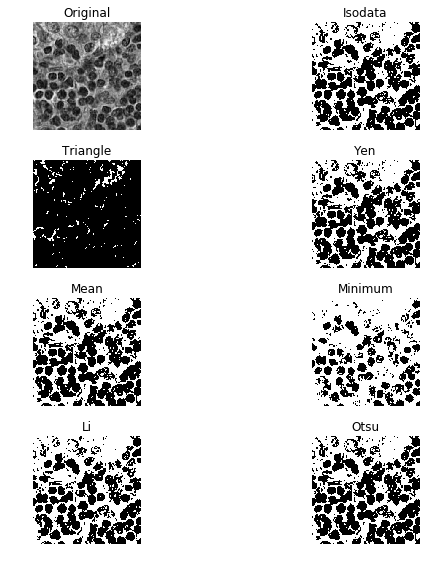

In [21]:
fig, ax = try_all_threshold(rgb2gray(master_matrix[-1]), figsize=(10, 8), verbose=False)


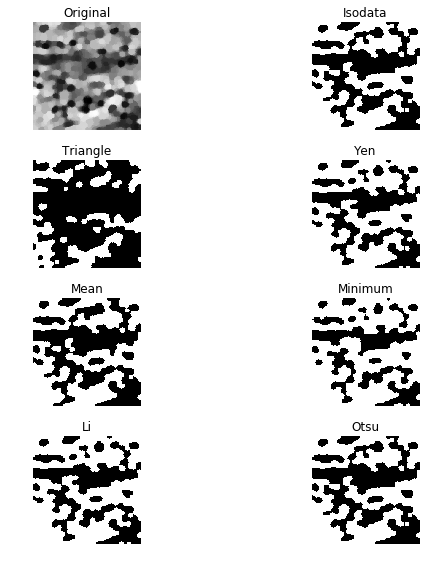

In [27]:
fig, ax = try_all_threshold(close_open(rgb2gray(master_matrix[1]), open_kernel_size=5, close_kernel_size=5),
                            figsize=(10, 8), verbose=False)


In [18]:
y[-1]

0

In [69]:
image_rgb = master_matrix[0]
image_gray = rgb2gray(image_rgb)

edges = canny(image_gray, sigma=2.0,
              low_threshold=0.35, high_threshold=0.8)

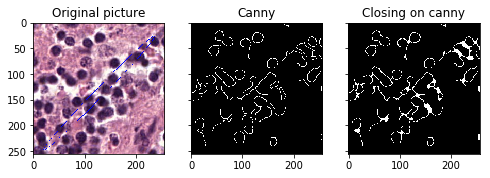

In [70]:
fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Canny')
ax2.imshow(edges, cmap='gray')
selem = disk(3)

ax3.set_title('Closing on canny')
ax3.imshow(closing(edges, selem=selem), cmap='gray')

In [71]:
# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators


result = hough_ellipse(edges, accuracy=1, threshold=250,
                       min_size=2, max_size=5)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
!python ../utils/process_images.py --image_files \
"/Z/personal-folders/interns/saket/github/pywsi/normal_tumor_combined_level0/*/*.png" --novalidate_images \
--clusters 2 --layout fitsne --output_folder ../normal_tumour_combined_level0_output